In [31]:
# standard python imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [32]:
data = np.load('exp_io_data\CoupledPendula_mean_in7_out7_Tmax1.0_data.npz')
for key, val in data.items():
    print(key)
    exec(key +'=val')

xlist
exp_out_list


In [33]:
x=xlist
y=exp_out_list
print(x.shape)
print(y.shape)

(2000, 14)
(2, 30, 2000, 7, 2)


In [34]:
x_in=x[:,0:7]
x_para=x[:,7:14]
#print(x_in)
#print(x_para)
v_int=np.zeros((2000,7))
x_train=x_in[0:1000,:]
x_train2=x[0:1000,:]
print(x_train.shape)
#print(x)

(1000, 7)


In [35]:

y_x=y[0,:,:,:,0]
y_v=y[0,:,:,:,1]/30
print(y_x.shape)
print(y_v.shape)

y_new=np.concatenate((y_x,y_v),axis=2)
y_new=torch.from_numpy(y_new)
y_new=torch.transpose(y_new,0,1)
print(y_new[1,1:2,:])
print(y_new[1,2:3,:])




(30, 2000, 7)
(30, 2000, 7)
tensor([[ 8.9990e-01,  3.9747e-01,  6.3987e-01, -1.6053e-01, -2.1341e-01,
         -8.2006e-01,  5.4416e-01, -9.1933e-02, -1.2846e-02, -5.4853e-02,
          2.2460e-02, -7.1046e-04,  9.9746e-02, -7.6736e-02]])
tensor([[ 0.7647,  0.3775,  0.5594, -0.1279, -0.2134, -0.6746,  0.4328, -0.1765,
         -0.0274, -0.1049,  0.0420,  0.0013,  0.1885, -0.1435]])


In [36]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(21, 21 ,bias=True)
        #self.layer2 = nn.Linear(14, 14,bias=True)
        #self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(21, 14,bias=True)
    def forward(self, x,activation="RELU"):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = x+torch.sigmoid(self.layer1(x))
        #x = x+torch.sigmoid(self.layer2(x))
        #x = x+torch.sigmoid(self.layer3(x))
        #x = x+torch.sigmoid(self.layer4(x))
        #x = x+torch.sigmoid(self.layer5(x))
        x = self.layer4(x)
        #x = F.relu(self.layer4(x))
        #x = F.relu(self.layer5(x))
        #x = torch.sigmoid(self.layer6(x))
        return x.float()


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=21, out_features=21, bias=True)
  (layer4): Linear(in_features=21, out_features=14, bias=True)
)


In [ ]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 14 ,bias=True)
        self.layer2 = nn.Linear(14, 14,bias=True)
        self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 14,bias=True)
    def forward(self, x,activation="RELU"):
        
        if activation=="RELU":
            x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
            x = x+0.1*(self.layer1(x))
            x = x+0.1*(self.layer2(x))
            x = x+0.1*(self.layer3(x))
            x = x+torch.sigmoid(self.layer4(x))
            #x = x+torch.sigmoid(self.layer5(x))
            #x = self.layer4(x)
            #x = F.relu(self.layer4(x))
            #x = F.relu(self.layer5(x))
            #x = torch.sigmoid(self.layer6(x))
        if activation=="SIG":
            x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
            x = x+torch.sigmoid(self.layer1(x))*0.1
            x = x+torch.sigmoid(self.layer2(x))*0.1
            x = x+torch.sigmoid(self.layer3(x))*0.1
            #x = x+torch.sigmoid(self.layer4(x))
            #x = x+torch.sigmoid(self.layer5(x))
            x = self.layer4(x)
            #x = F.relu(self.layer4(x))
            #x = F.relu(self.layer5(x))
            #x = torch.sigmoid(self.layer6(x))            
        return x.float()


net = Net()
print(net)




In [23]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

4
torch.Size([21, 21])


In [24]:
x_in_train= y_new[0:1000,0,:]
x_para_train=torch.tensor(x[0:1000,7:14])
print(x_in_train.shape)
print(x_para_train.shape)
x_data=torch.cat((x_in_train,x_para_train),1)
print(x_data.shape)

torch.Size([1000, 14])
torch.Size([1000, 7])
torch.Size([1000, 21])


In [25]:
x_data=torch.cat((y_new[0:1000,0,:],x_para_train),1)
input = x_data
print(x_data.shape)
out = net(input,"SIG")
print(out)
print(out.shape)

torch.Size([1000, 21])
tensor([[ 1.1084,  0.7111, -1.4031,  ...,  0.6357, -0.3874,  1.2202],
        [ 0.9140,  0.2008, -0.9675,  ...,  0.2906, -0.4554,  0.1230],
        [ 1.2755, -0.0204, -0.1703,  ...,  0.3424, -0.3373, -0.2543],
        ...,
        [ 0.5677, -0.4113, -0.4558,  ...,  0.3262, -0.7629, -0.0239],
        [ 0.6205,  0.4270, -0.5547,  ...,  0.0457, -0.8848,  0.5682],
        [ 0.5804,  0.6911, -0.7695,  ...,  0.5725, -0.2612, -0.2862]],
       grad_fn=<AddmmBackward>)
torch.Size([1000, 14])


In [26]:
net.zero_grad()
out.backward(torch.randn(1000,14))

In [27]:

x_para_train=torch.tensor(x_para[0:1000,:])



F=1 #Fth frame
y_train=y_new[0:1000,F:F+1,:]
print(y_train.shape)
target=y_train
target_new=target.view(1000,14).float()
print(target_new.shape)
criterion=nn.MSELoss()
loss=criterion(out,target_new)
print(loss)

torch.Size([1000, 1, 14])
torch.Size([1000, 14])
tensor(0.9225, grad_fn=<MseLossBackward>)


In [28]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.01, betas=(0.9, 0.999), eps=1e-09, weight_decay=0.1, amsgrad=False)  #adam optimizer
    

In [29]:

target=y_train
target_new=target.view(1000,14)
print(target_new.shape)
criterion=nn.MSELoss()
loss=criterion(out,target_new)
print(loss)

torch.Size([1000, 14])
tensor(0.9225, grad_fn=<MseLossBackward>)


In [30]:
for i in range(100):
    sum_loss=0
    for j in range(12):
        optimizer.zero_grad()
        output = net(input)
        input =torch.cat((output,x_para_train),1)
        target=y_new[0:1000,1:2,:]
        target_new=target.view(1000,14).float()
        loss= criterion(output, target_new)
        sum_loss+=loss
        print(loss)
    sum_loss.backward()
    optimizer.step()
   


tensor(0.9225, grad_fn=<MseLossBackward>)
tensor(0.8667, grad_fn=<MseLossBackward>)
tensor(0.7780, grad_fn=<MseLossBackward>)
tensor(0.7299, grad_fn=<MseLossBackward>)
tensor(0.7493, grad_fn=<MseLossBackward>)
tensor(0.7451, grad_fn=<MseLossBackward>)
tensor(0.7469, grad_fn=<MseLossBackward>)
tensor(0.7463, grad_fn=<MseLossBackward>)
tensor(0.7474, grad_fn=<MseLossBackward>)
tensor(0.7468, grad_fn=<MseLossBackward>)
tensor(0.7468, grad_fn=<MseLossBackward>)
tensor(0.7468, grad_fn=<MseLossBackward>)
tensor(0.6744, grad_fn=<MseLossBackward>)
tensor(0.6522, grad_fn=<MseLossBackward>)
tensor(0.6543, grad_fn=<MseLossBackward>)
tensor(0.6539, grad_fn=<MseLossBackward>)
tensor(0.6540, grad_fn=<MseLossBackward>)
tensor(0.6537, grad_fn=<MseLossBackward>)
tensor(0.6538, grad_fn=<MseLossBackward>)
tensor(0.6536, grad_fn=<MseLossBackward>)
tensor(0.6537, grad_fn=<MseLossBackward>)
tensor(0.6537, grad_fn=<MseLossBackward>)
tensor(0.6537, grad_fn=<MseLossBackward>)
tensor(0.6537, grad_fn=<MseLossBac

RuntimeError: Trying to backward through the graph a second time (or directly access saved variables after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved variables after calling backward.

In [16]:

# for i in range(20):
#     sum_loss=0
#     for j in range(12):
#         optimizer.zero_grad()
#         output = net(input)
        
#         target=y_new[0:1000,j,:]
#         target_new=target.view(1000,14).float()
#         loss = criterion(output, target_new)

#         loss.backward(retain_graph=True)
#         input =torch.cat((output,x_para_train),1)
#         print(loss)
#     #print(sum_loss)
#     optimizer.step()
#     print(loss)

In [28]:
print(y_new.shape)
y_test=y_new[1000:2000,F:F+1,:]
print(y_test.shape)

torch.Size([2000, 30, 14])
torch.Size([1000, 1, 14])


In [33]:
x_test=torch.tensor(x[1000:2000,:])
print(x_test.shape)
x_para_test=torch.tensor(x[1000:2000,7:14])
x_test_cat=torch.cat((x_test,x_para_test),1)
print(x_test_cat.shape)

torch.Size([1000, 14])
torch.Size([1000, 21])


In [ ]:
x_para=x[:,7:14]

In [36]:


test_out=net(x_test_cat)
print(test_out.shape)
#LOSS = criterion(test_out, y_test)
# print(test_out)
# print(y_test)
y_test_new=y_test.squeeze(1)
print(y_test_new.shape)
# test_loss=criterion(y_test_new,test_out)
# print(test_loss)

torch.Size([1000, 14])
torch.Size([1000, 14])


Text(0, 0.5, 'y_pred')

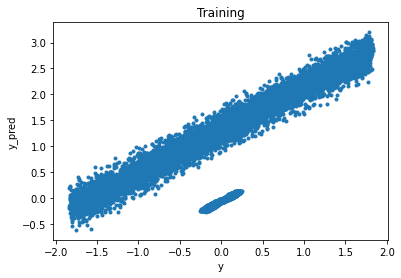

In [37]:
plt.plot(y_test_new.flatten(), 5*test_out.detach().numpy().flatten(), '.')
plt.title('Training')
plt.xlabel('y')
plt.ylabel('y_pred')

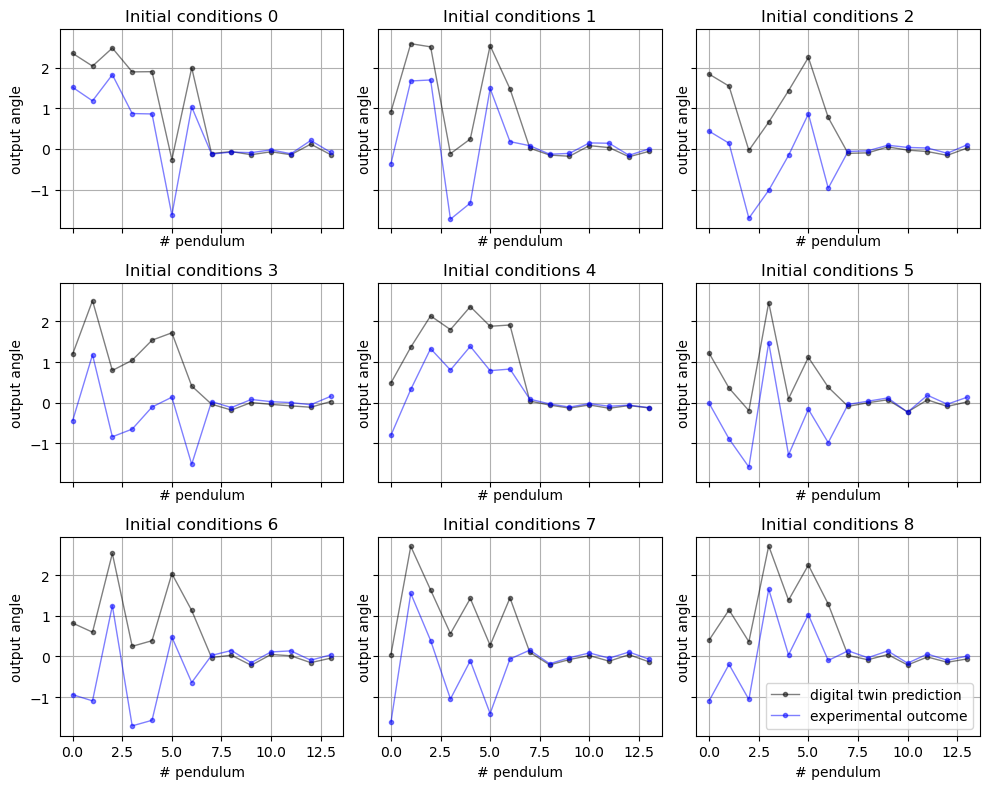

In [39]:
def plot_dt_exp_comparison(yexp, ypred):

    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = [10,8], dpi = 100, sharex=True, sharey=True)
    for i in range(9):
        plt.sca(axs.flatten()[i])
        plt.plot(ypred[i], '.-', lw = 1, c = 'k', alpha = 0.5, label = 'digital twin prediction')
        plt.plot(yexp[i], '.-', lw = 1, c = 'b', alpha = 0.5, label = 'experimental outcome')
        plt.xlabel('# pendulum')
        plt.ylabel('output angle')
        plt.title(f'Initial conditions {i}')
        plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig('img/coupled_pendula_dt_examples.png')
    plt.show()
    
plot_dt_exp_comparison(y_test_new,5*test_out.detach())

In [29]:

class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()

        self.layer1 = nn.RNN(14, 14, 3)


    def forward(self, x):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.layer1(x)

        return x


net2 = Net2()
print(net2)

Net2(
  (layer1): RNN(14, 14, num_layers=3)
)


params2 = list(net2.parameters())
print(len(params2))
print(params2[0].size())

In [ ]:
x_data=torch.tensor(x)
input = x_data
out = net2(input)
print(out)
print(out.shape)

In [ ]:
target=y1[0:1000,:,:]
target_new=target.view(1000,7)

In [ ]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-06, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net2(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)
